# Importing Libraries

In [82]:
import numpy as np
import pandas as pd

import pprint

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.rcParams['font.size'] = 24


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [83]:
df1 = pd.read_csv("train_values.csv")
df1

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df2 = pd.read_csv("train_labels.csv")
df2

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [85]:
df = pd.merge(df1,df2,on = 'building_id')

In [86]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [87]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

# EDA

Text(0.5, 1.0, 'Damage grade')

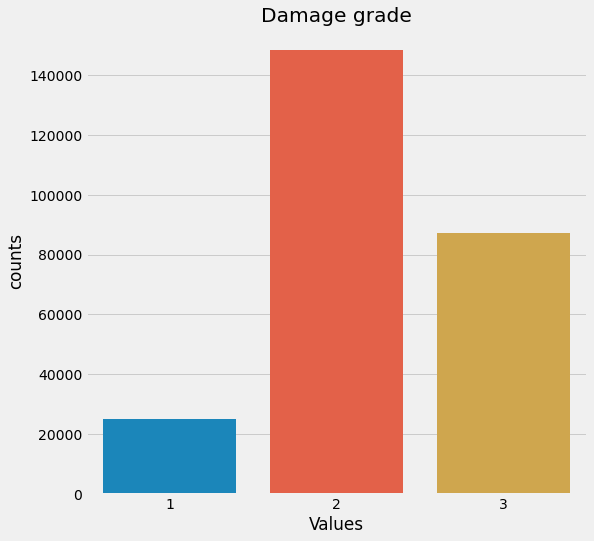

In [89]:
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
sns.countplot(df['damage_grade'])
plt.xlabel('Values'); plt.ylabel('counts'); 
plt.title('Damage grade')

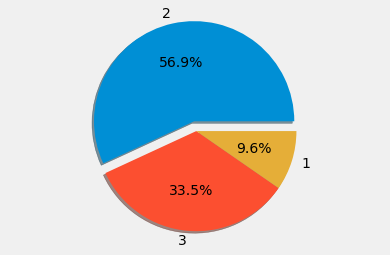

In [90]:
percent = list(df['damage_grade'].value_counts()/len(df['damage_grade'])*100)
label = list(df['damage_grade'].value_counts().index)
explode = (0.1,0,0)
fig,ax1 = plt.subplots()
ax1.pie(percent, explode=explode, labels=label, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

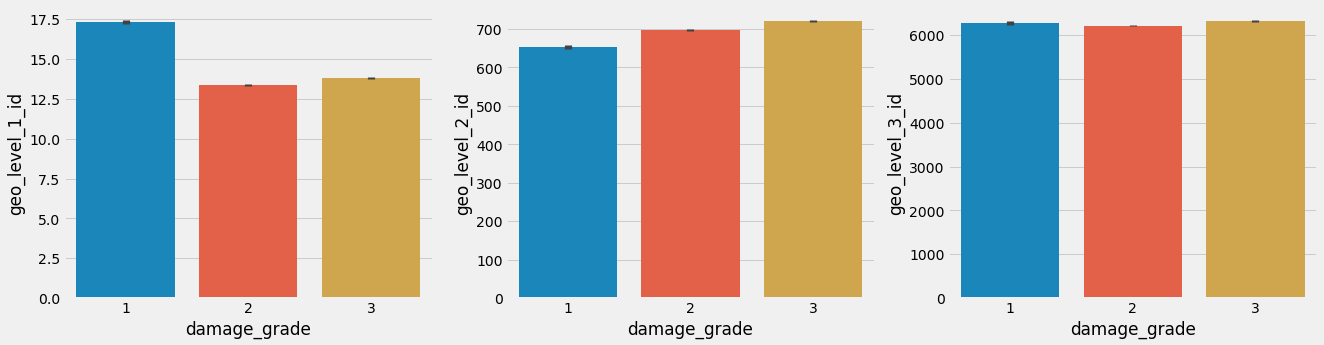

In [91]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(df['damage_grade'], df['geo_level_1_id'])

plt.subplot(1,3,2)
sns.barplot(df['damage_grade'], df['geo_level_2_id'])

plt.subplot(1,3,3)
sns.barplot(df['damage_grade'], df['geo_level_3_id'])

plt.show()

<AxesSubplot:xlabel='damage_grade', ylabel='age'>

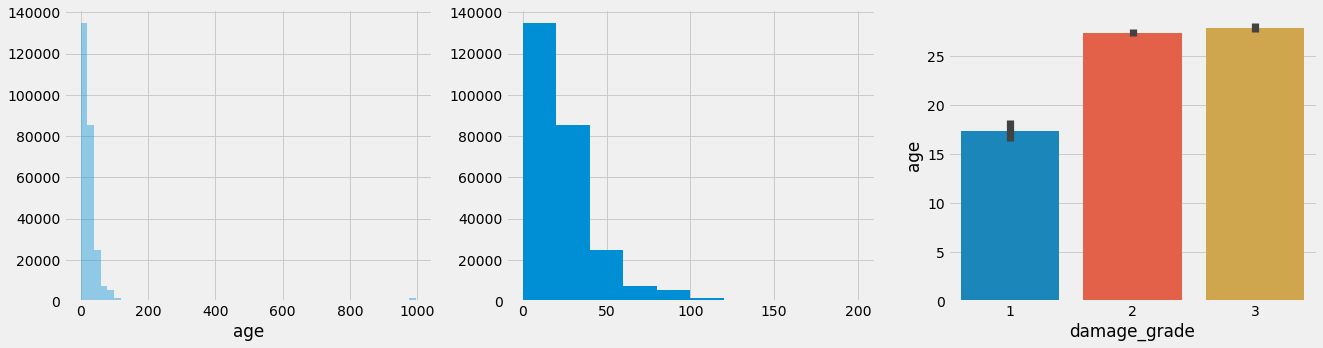

In [92]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(df['age'], kde = False)

plt.subplot(1,3,2)
plt.hist(df['age'], range=(0,200))

plt.subplot(1,3,3)
sns.barplot(df['damage_grade'],df['age'])

<AxesSubplot:xlabel='damage_grade', ylabel='count_floors_pre_eq'>

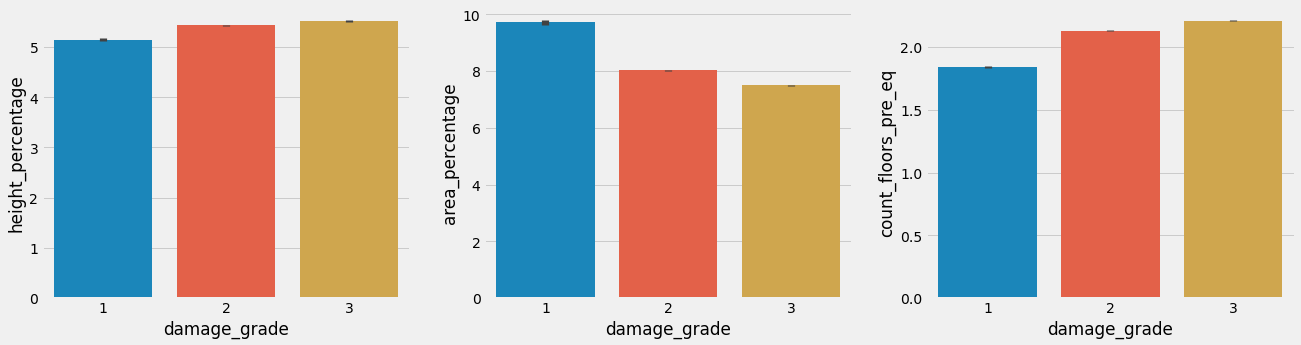

In [93]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.barplot(df['damage_grade'], df['height_percentage'])

plt.subplot(1,3,2)
sns.barplot(df['damage_grade'], df['area_percentage'])

plt.subplot(1,3,3)
sns.barplot(df['damage_grade'], df['count_floors_pre_eq'])

# Heat map

<AxesSubplot:>

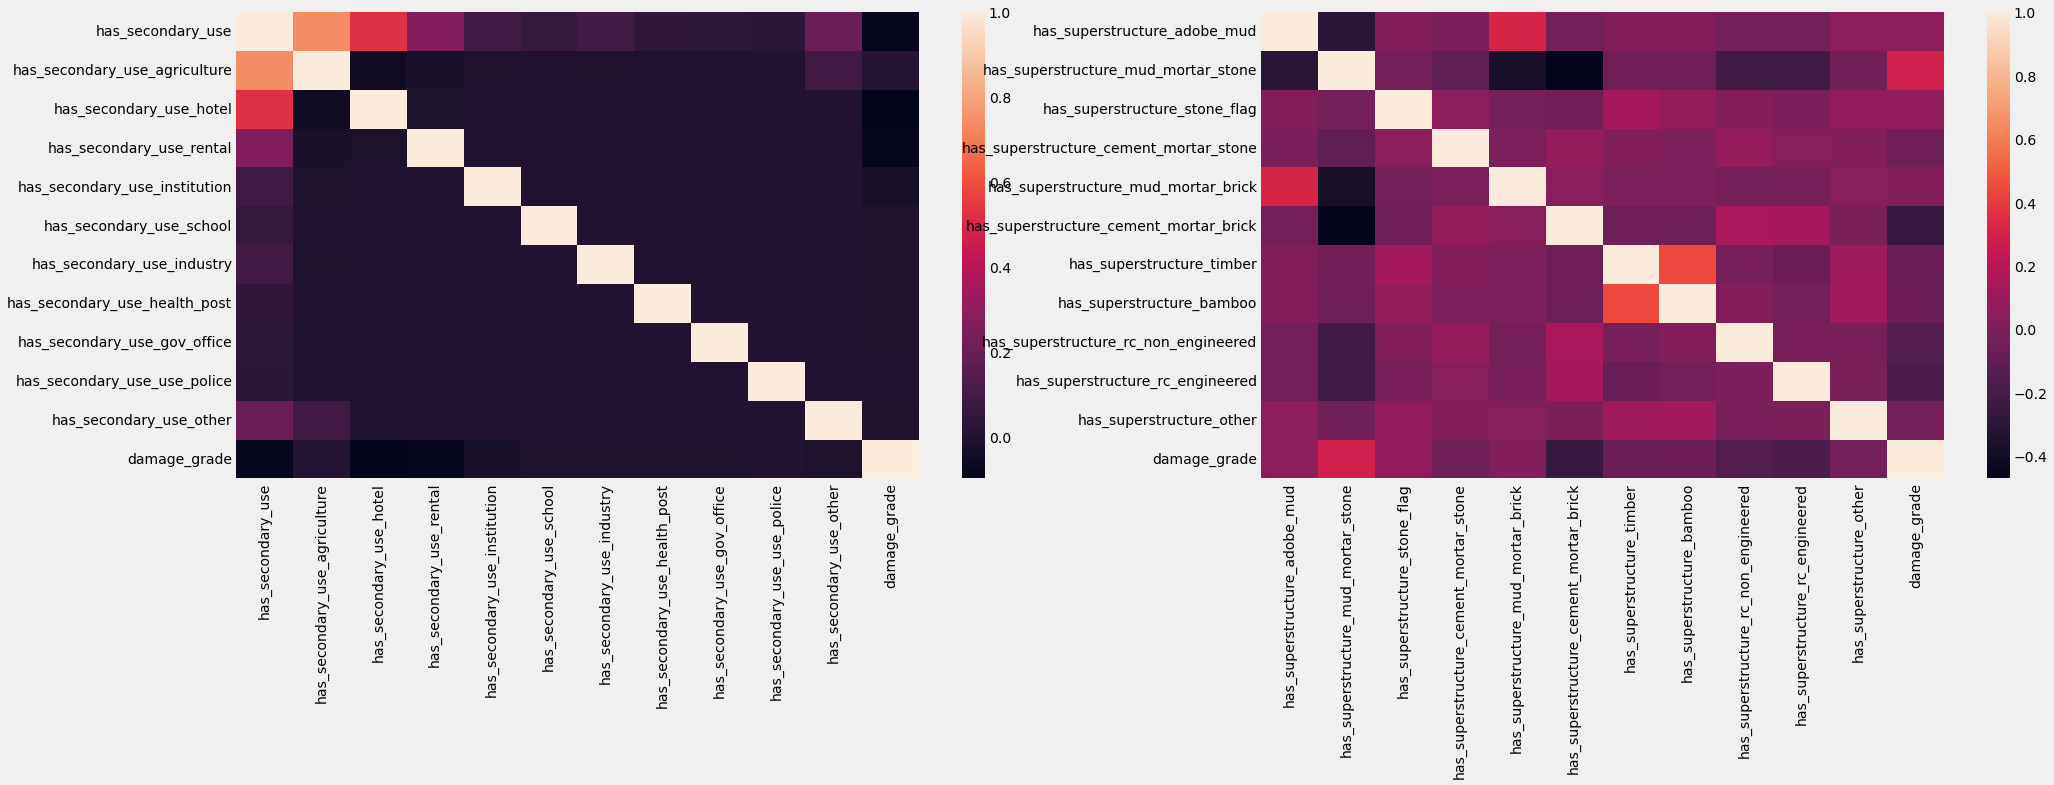

In [94]:
superstructure_cols = [x for x in df.columns if 'super' in x]
secondary_use_cols = [x for x in df.columns if 'secondary' in x]

superstructure_corr = df[superstructure_cols+['damage_grade']].corr()
secondary_use_corr = df[secondary_use_cols+['damage_grade']].corr()

plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
sns.heatmap(secondary_use_corr)

plt.subplot(1,2,2)
sns.heatmap(superstructure_corr)

<AxesSubplot:xlabel='damage_grade', ylabel='has_superstructure_cement_mortar_brick'>

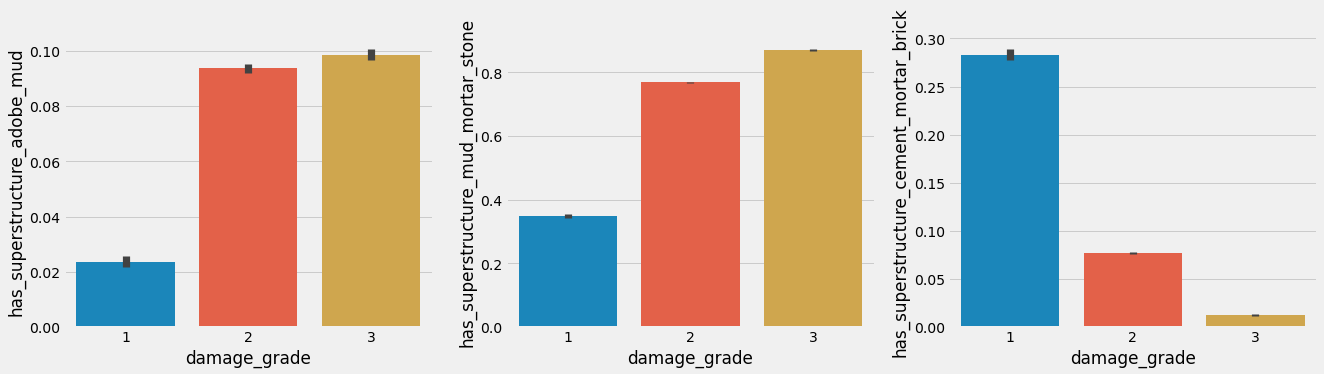

In [95]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.barplot(df['damage_grade'], df['has_superstructure_adobe_mud'])

plt.subplot(1,3,2)
sns.barplot(df['damage_grade'], df['has_superstructure_mud_mortar_stone'])

plt.subplot(1,3,3)
sns.barplot(df['damage_grade'], df['has_superstructure_cement_mortar_brick'])

In [96]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [97]:
df_cat = df.select_dtypes(include=['object'])
print(len(df_cat.columns))
df_cat.columns

8


Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


In [99]:
df=df.drop_duplicates()

In [100]:
df.duplicated().sum()

0

In [101]:
df.head()
df.shape

(260601, 40)

# Feature engineering

In [102]:
geo_age_mean = df.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id'])['age'].agg(['mean']).reset_index().rename(columns={'mean':'geo_grp_age_mean'})
geo_height_mean = df.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id'])['height_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'geo_grp_height_mean'})
geo_area_mean = df.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id'])['area_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'geo_grp_area_mean'})

In [103]:
type_age_mean = df.groupby(['foundation_type','roof_type','ground_floor_type','other_floor_type'])['age'].agg(['mean']).reset_index().rename(columns={'mean':'type_grp_age_mean'})
type_height_mean = df.groupby(['foundation_type','roof_type','ground_floor_type','other_floor_type'])['height_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'type_grp_height_mean'})
type_area_mean = df.groupby(['foundation_type','roof_type','ground_floor_type','other_floor_type'])['area_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'type_grp_area_mean'})

In [104]:
df = pd.merge(df, geo_age_mean, on=['geo_level_1_id','geo_level_2_id','geo_level_3_id'])
df = pd.merge(df, geo_height_mean,on= ['geo_level_1_id','geo_level_2_id','geo_level_3_id'])
df = pd.merge(df, geo_area_mean,on= ['geo_level_1_id','geo_level_2_id','geo_level_3_id'])

df = pd.merge(df, type_age_mean,on= ['foundation_type','roof_type','ground_floor_type','other_floor_type'])
df = pd.merge(df, type_height_mean, on=['foundation_type','roof_type','ground_floor_type','other_floor_type'])
df = pd.merge(df, type_area_mean, on=['foundation_type','roof_type','ground_floor_type','other_floor_type'])

In [105]:
colname=[]
val=[]
bin_cols = df.columns[df.columns.str.contains('has')]
for bcol in bin_cols:
  colname.append(bcol)
  val.append(df[bcol].value_counts().sort_index().values)
pd.DataFrame(val, index=colname)

,0,1
has_superstructure_adobe_mud,237500,23101
has_superstructure_mud_mortar_stone,62040,198561
has_superstructure_stone_flag,251654,8947
has_superstructure_cement_mortar_stone,255849,4752
has_superstructure_mud_mortar_brick,242840,17761
has_superstructure_cement_mortar_brick,240986,19615
has_superstructure_timber,194151,66450
has_superstructure_bamboo,238447,22154
has_superstructure_rc_non_engineered,249502,11099
has_superstructure_rc_engineered,256468,4133


In [106]:
freq_cols = ['land_surface_condition','foundation_type','roof_type',
             'ground_floor_type','other_floor_type','position','plan_configuration',
             'legal_ownership_status']

def frequency_encode(cols, df, self_encoding=False):
  for c in cols:
    fq_dict = df[c].value_counts().to_dict()
    if self_encoding:
      df[c] = df[c].map(fq_dict)
    else:
      df[c+'fq_enc'] = df[c].map(fq_dict)
  return df
df_freq = frequency_encode(freq_cols, df, self_encoding=True)

In [107]:
corr_matrix = df.drop(columns=['building_id','damage_grade'], axis=1).corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
print('Number of columns having collinearity with other columns other than target: ', len(to_drop))

Number of columns having collinearity with other columns other than target:  0


# Scaling data

In [108]:
scaler = StandardScaler()

features = df.drop(columns=['building_id','damage_grade'], axis=1).columns

X = df.drop(columns=['building_id','damage_grade'], axis=1)

y = df['damage_grade']

sc = scaler.fit(X)
temp_df_X = sc.transform(X)

X = pd.DataFrame(temp_df_X, columns=features)


# Model creation

In [109]:
def check_model_f1_score(model):
  model.fit(X_train, y_train)
  test_y_pred = model.predict(X_test)
  return f1_score(y_test, test_y_pred, average='micro')

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
grade_guess = y_test.value_counts().index[0]
base_prediction = np.full(np.shape(y_test), grade_guess)
print('F1 score : ',f1_score(y_test, base_prediction, average='micro'))

F1 score :  0.5680152466711861


In [112]:
lr = LogisticRegression(multi_class='multinomial')
lr_score = check_model_f1_score(lr)
print('lr score: ', lr_score)

lr score:  0.5935713280720379


In [113]:
dc = DecisionTreeClassifier()
dc_score = check_model_f1_score(dc)
print('dc score: ', dc_score)

dc score:  0.6637929931824867


In [116]:
rc = RandomForestClassifier()
rc_score = check_model_f1_score(rc)
print('rc score: ', rc_score)

rc score:  0.7258924802701424


In [117]:
knc = KNeighborsClassifier()
knc_score = check_model_f1_score(knc)
print('knc score: ', knc_score)

knc score:  0.6563615200624192


In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
xg = xgb.XGBClassifier()
xg_score = check_model_f1_score(xg)
print('xg score: ', xg_score)

xg score:  0.11236745500825009


<Figure size 576x432 with 0 Axes>

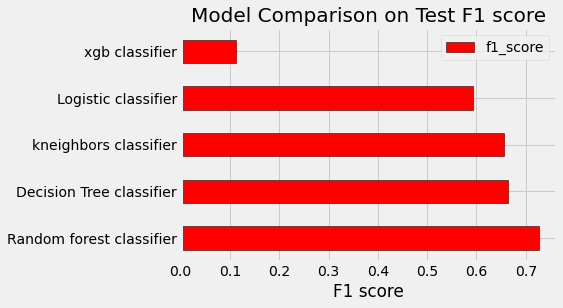

In [119]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
model_comparison = pd.DataFrame({'model':['Logistic classifier','Decision Tree classifier',
                       'Random forest classifier', 'kneighbors classifier',
                       'xgb classifier'], 'f1_score':[lr_score,dc_score,rc_score,
                                                      knc_score,xg_score]})

model_comparison.sort_values('f1_score', ascending = False).plot(x = 'model', y = 'f1_score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('F1 score'); plt.xticks(size = 14)
plt.title('Model Comparison on Test F1 score', size = 20);